In [1]:
!pip install -U imbalanced-learn

In [2]:
!pip install imblearn

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


c:\Users\Jaisurya\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

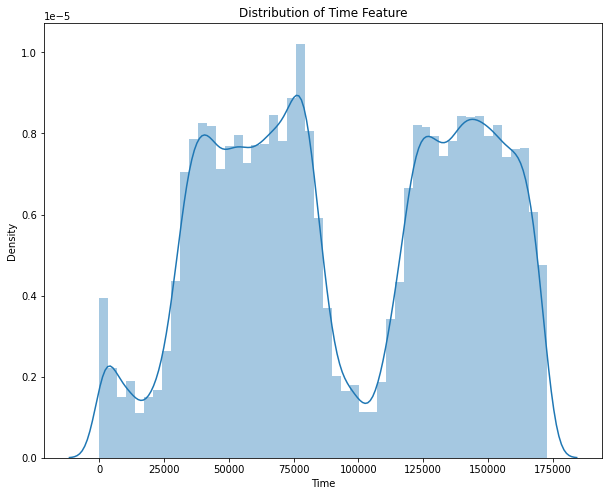

In [6]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

### Scaling Amount and time:

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [8]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [9]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
224871,144004.0,-0.260475,0.720519,-0.972748,-0.996053,0.120759,0.066542,0.889826,0.337782,-0.421105,...,-0.097750,0.126290,-0.099238,0.695187,-0.277675,-0.126098,129.00,0,0.162524,1.035842
35527,38156.0,0.964904,-1.287420,1.679457,1.169608,-1.870159,1.028888,-1.457852,0.480219,0.803118,...,-0.058746,0.060591,0.300960,-0.200735,0.125539,0.055203,108.86,0,0.082002,-1.193097
248574,154001.0,-0.844864,0.868177,2.679718,3.205111,1.008596,0.954989,0.211651,0.271502,-1.644190,...,-0.200225,-0.564037,0.047984,-0.091966,-0.113444,-0.145074,0.79,0,-0.350071,1.246358
57950,48156.0,0.900473,-0.425023,0.700681,1.443844,-0.432076,0.833148,-0.358989,0.315634,0.624904,...,-0.213927,-0.267680,0.589364,-0.266141,0.049289,0.027011,111.00,0,0.090558,-0.982518
256283,157621.0,2.072143,0.180129,-1.683469,0.422668,0.426263,-0.892484,0.207519,-0.256106,0.445539,...,0.339804,0.576453,-0.252290,0.168568,-0.060740,-0.029394,2.18,0,-0.344514,1.322588


In [10]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [11]:
X = df.iloc[:, df.columns!='Class']
y = df.iloc[:, df.columns == 'Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
df_test = pd.concat([X_test,y_test], axis = 1)
df_test.sample(5)
df_fraud = df_test[df_test['Class'] == 1]
df_fraud.head()
# cnt=0
# for i in df_test['Class']:
#     if i==1:
#         print(i.index)
df_fraud.to_csv("fraud_test_data.csv")
#print(cnt)

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'